In [69]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import os
import matplotlib.pyplot as plt

In [70]:
!pwd

/content/drive/MyDrive/Colab Notebooks/ANN-regression


In [71]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/ANN-regression")

In [72]:
!pwd

/content/drive/MyDrive/Colab Notebooks/ANN-regression


In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
house=fetch_california_housing()

In [75]:
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [76]:
house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [77]:
x=pd.DataFrame(house.data,columns=house.feature_names)

In [78]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [79]:
x.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [80]:
y=pd.DataFrame(house.target,columns=["target "])

# spliting the entire dataset into training and testing

In [81]:
X_train_full,x_test, y_train_full, y_test=train_test_split(x,y,test_size=0.30,random_state=45)

In [82]:
X_train_full.shape

(14448, 8)

In [83]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train_full,y_train_full,random_state=40)

In [84]:
X_train.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [85]:
X_val.shape

(3612, 8)

In [86]:

X_train.shape

(10836, 8)

In [87]:
X_train.shape[1:]  # calculate the number of independend feature

(8,)

In [88]:
SD=StandardScaler()
X_train=SD.fit_transform(X_train)
X_val=SD.transform(X_val)
Y_train=SD.fit_transform(Y_train)

SD.fit(x_test,y_test)

StandardScaler()

# tensorboard callback function

In [89]:
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2024_02_05_17_23_50


#  model check point callback

In [90]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

# early stopping of the model

In [91]:
early_stopping=tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [92]:
# this is regressor problem statement therefore we direct used dense layer
Layers=[
    tf.keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
]

In [93]:

model=tf.keras.models.Sequential(Layers)

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1111 (4.34 KB)
Trainable params: 1111 (4.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# calculating the accuarcy score r2

In [95]:
def coefficent_of_deteremination(y_true,y_pred):
  from keras import backend as K
  SS_res=K.sum(K.square(y_true-y_pred))
  SS_total=K.sum(K.square(y_true -K.mean(y_true)))
  return (1-SS_res/(SS_total+K.epsilon()))

# model compilation

In [96]:
loss="mean_squared_error"
optimizer="SGD"
model.compile(loss=loss,optimizer=optimizer,metrics=[coefficent_of_deteremination])

# training the model


In [97]:
epochs=10
history=model.fit(X_train, Y_train,epochs=epochs,validation_data=(X_val,Y_val),callbacks=[early_stopping,tb_cb,checkpointing_cb  ] )

Epoch 1/10
339/339 [==============================] - 15s 4ms/step - loss: 0.6281 - coefficent_of_deteremination: 0.3493 - val_loss: 5.0099 - val_coefficent_of_deteremination: -3.1257
Epoch 2/10
 51/339 [===>..........................] - ETA: 0s - loss: 0.4427 - coefficent_of_deteremination: 0.5494

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


339/339 [==============================] - 1s 4ms/step - loss: 0.5146 - coefficent_of_deteremination: 0.4471 - val_loss: 4.8336 - val_coefficent_of_deteremination: -2.9754
Epoch 3/10
339/339 [==============================] - 2s 5ms/step - loss: 0.3802 - coefficent_of_deteremination: 0.5979 - val_loss: 4.8859 - val_coefficent_of_deteremination: -3.0281
Epoch 4/10
339/339 [==============================] - 2s 6ms/step - loss: 0.3515 - coefficent_of_deteremination: 0.6292 - val_loss: 4.9148 - val_coefficent_of_deteremination: -3.0559
Epoch 5/10
339/339 [==============================] - 1s 4ms/step - loss: 0.3387 - coefficent_of_deteremination: 0.6421 - val_loss: 4.6923 - val_coefficent_of_deteremination: -2.8723
Epoch 6/10
339/339 [==============================] - 1s 4ms/step - loss: 0.3300 - coefficent_of_deteremination: 0.6465 - val_loss: 4.9393 - val_coefficent_of_deteremination: -3.0807
Epoch 7/10
339/339 [==============================] - 1s 4ms/step - loss: 0.3217 - coefficent_of

In [98]:
pd.DataFrame(history.history )

,loss,coefficent_of_deteremination,val_loss,val_coefficent_of_deteremination
0,0.628100,0.349319,5.009853,-3.125659
1,0.514632,0.447069,4.833562,-2.975404
2,0.380167,0.597935,4.885940,-3.028052
3,0.351480,0.629169,4.914845,-3.055918
4,0.338730,0.642081,4.692319,-2.872307
5,0.330013,0.646457,4.939321,-3.080715
6,0.321702,0.657945,4.780330,-2.947935
7,0.315778,0.663635,4.940094,-3.079812
8,0.309785,0.673869,5.159439,-3.265476
9,0.303783,0.676155,4.886941,-3.035915


<Axes: >

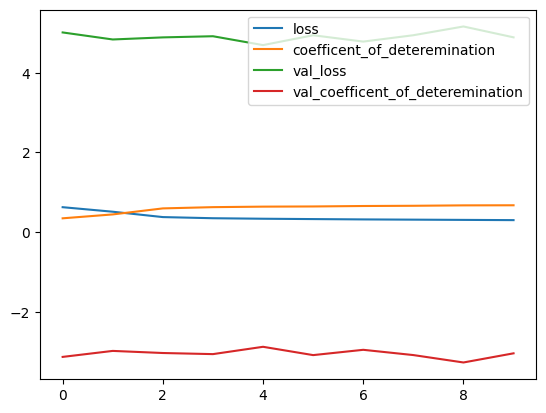

In [99]:


pd.DataFrame(history.history ).plot()

# model evalution

In [108]:
model.evaluate(x_test,y_test)

194/194 [==============================] - 0s 2ms/step - loss: 10388.9990 - coefficent_of_deteremination: -8735.1855


[10388.9990234375, -8735.185546875]

In [101]:
model.predict(x_test)

194/194 [==============================] - 0s 1ms/step


array([[75.61679],
       [87.07632],
       [65.79721],
       ...,
       [86.11548],
       [57.67106],
       [96.08105]], dtype=float32)

# model saving

In [102]:
# model saving

In [103]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [104]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2024_02_05_17_26_40_.h5 will be saved at TRAINED_MODEL/Model_2024_02_05_17_26_40_.h5


'TRAINED_MODEL/Model_2024_02_05_17_26_40_.h5'

In [105]:
tf.keras.models.save_model(model, UNIQUE_PATH)

<ipython-input-105-e4cf6f9d2155>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, UNIQUE_PATH)


In [64]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 339}

In [106]:
%load_ext tensorboard

In [107]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>